<a href="https://colab.research.google.com/github/piyush-17/21BBS0194/blob/main/capstone_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

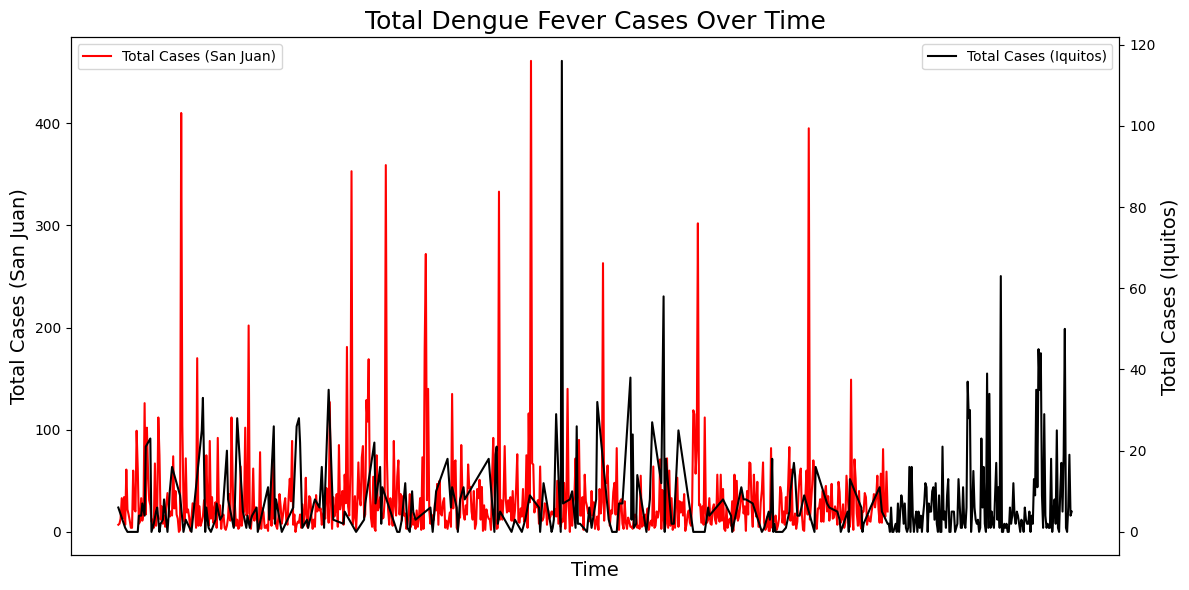

In [ ]:
# !pip install category_encoders

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Read local CSV files (uploaded manually in the Colab session)
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

# Merge features and labels
train = pd.merge(train_features, train_labels)

# Split the dataset into train and validation using the size of the test set
train, val = train_test_split(train, test_size=len(test), random_state=42)

# Split by city
sj_train = train.loc[train['city'] == 'sj']
iq_train = train.loc[train['city'] == 'iq']
sj_test = test.loc[test['city'] == 'sj']
iq_test = test.loc[test['city'] == 'iq']
sj_val = val.loc[val['city'] == 'sj']
iq_val = val.loc[val['city'] == 'iq']

# Plotting total dengue cases over time
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='week_start_date', y='total_cases', data=sj_train, ax=ax, color='red', label='Total Cases (San Juan)')
ax2 = ax.twinx()
sns.lineplot(x='week_start_date', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

# Labels and title
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=14)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=14)
ax2.set_title('Total Dengue Fever Cases Over Time', fontsize=18)

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Clean x-ticks
ax.set_xticks([])

plt.tight_layout()
plt.show()


<ipython-input-13-69b0fe8f3999>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sj_monthly = sj_cases.resample('M').sum()
<ipython-input-13-69b0fe8f3999>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  iq_monthly = iq_cases.resample('M').sum()


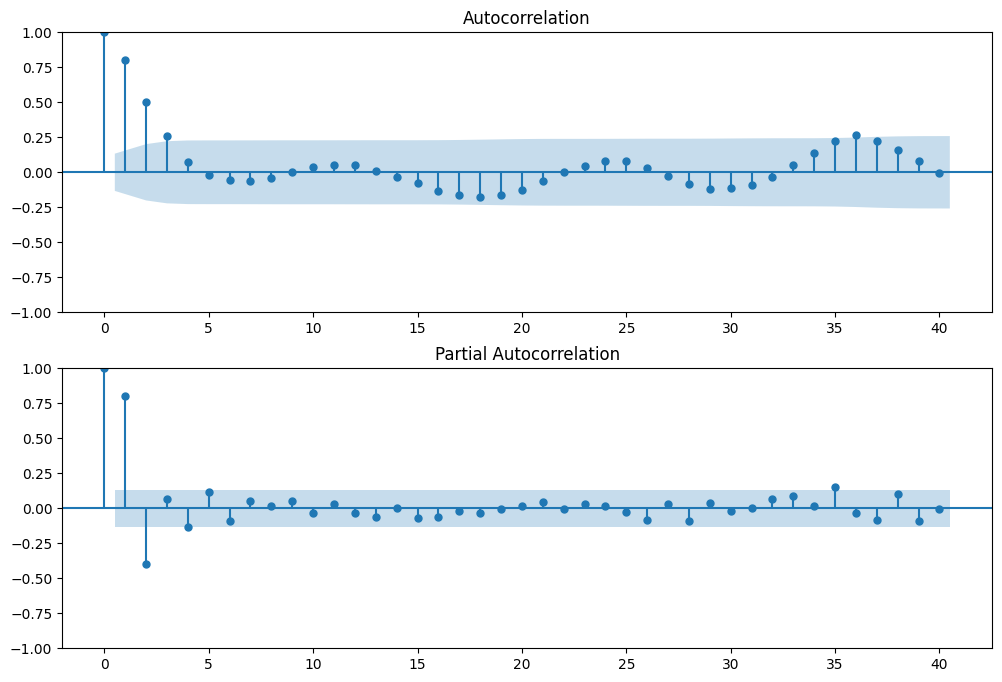

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

X = pd.read_csv("dengue_features_train.csv")
y = pd.read_csv("dengue_labels_train.csv")

#setting a datetime index
y.index = pd.DatetimeIndex(X.week_start_date)

#seperating the data for the 2 cities
sj_cases = y.total_cases[y.city == 'sj']
iq_cases = y.total_cases[y.city == 'iq']

#month sampling
sj_monthly = sj_cases.resample('M').sum()
iq_monthly = iq_cases.resample('M').sum()


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sj_monthly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sj_monthly, lags=40, ax=ax2)

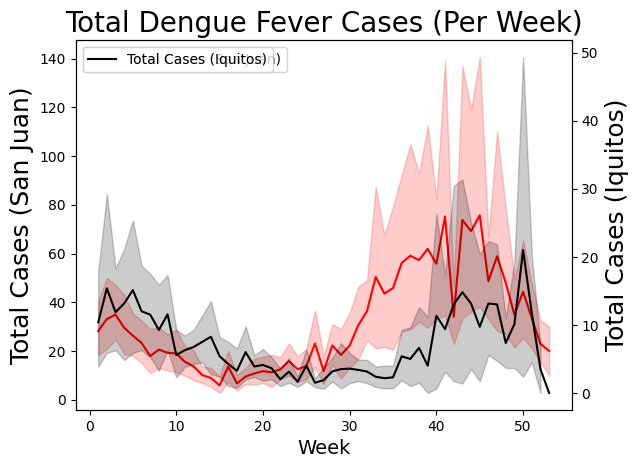

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='weekofyear', y='total_cases', data=sj_train, ax=ax, color='r', label='Total Cases (San Juan)')
ax2 = ax.twinx()

sns.lineplot(x='weekofyear', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

ax.set_xlabel('Week', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=18)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=18)
ax2.set_title('Total Dengue Fever Cases (Per Week)', fontsize=20)

ax.legend(loc='upper left')
#ax.legend(["Total Cases (San Juan)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
plt.show();

In [ ]:

# The climate of Puerto Rico is tropical, hot all year round, with a hot and muggy season from May to October
# and a relatively cool season from December to March, with November and April as intermediate months.

# Peru has two seasons owing to its proximity to the equator. These are not traditionally known as summer and
# winter, but as the rainy/wet season ('summer') which runs from December to March, and the dry season ('winter')
# which runs from May to September.
# Convert week_start_date to datetime and extract the month
# Make deep copies to safely modify the slices
sj_train = sj_train.copy()
sj_test = sj_test.copy()
sj_val = sj_val.copy()
iq_train = iq_train.copy()
iq_test = iq_test.copy()
iq_val = iq_val.copy()

# Extract month from week_start_date
sj_train.loc[:, 'month'] = pd.to_datetime(sj_train['week_start_date']).dt.month
sj_test.loc[:, 'month'] = pd.to_datetime(sj_test['week_start_date']).dt.month
sj_val.loc[:, 'month'] = pd.to_datetime(sj_val['week_start_date']).dt.month

iq_train.loc[:, 'month'] = pd.to_datetime(iq_train['week_start_date']).dt.month
iq_test.loc[:, 'month'] = pd.to_datetime(iq_test['week_start_date']).dt.month
iq_val.loc[:, 'month'] = pd.to_datetime(iq_val['week_start_date']).dt.month



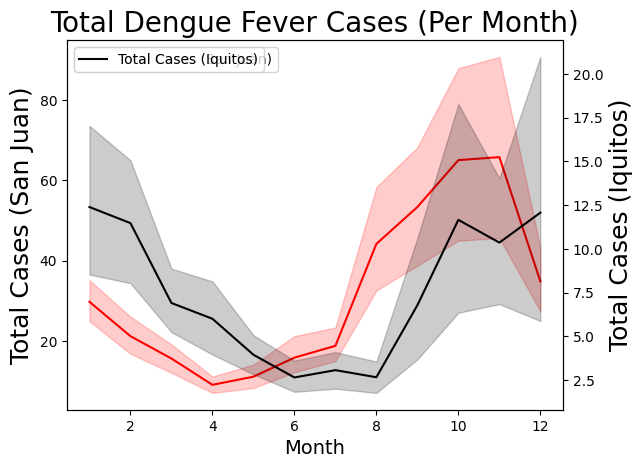

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='month', y='total_cases', data=sj_train, ax=ax, color='r', label='Total Cases (San Juan)')
ax2 = ax.twinx()

sns.lineplot(x='month', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=18)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=18)
ax2.set_title('Total Dengue Fever Cases (Per Month)', fontsize=20)

ax.legend(loc='upper left')
#ax.legend(["Total Cases (San Juan)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
plt.show();

In [ ]:
# -------------------- Season Assignment Based on Local Climate --------------------

# San Juan (Puerto Rico) Climate-Based Season Logic:
# -----------------------------------------------------
# Puerto Rico has a tropical climate with the following seasonal distinctions:
# - May to October         → Hot & Humid Season           → Code 3
# - December to March      → Cool Season                  → Code 2
# - April and November     → Intermediate Season          → Code 1

def assign_sj_season(month):
    if 5 <= month <= 10:
        return 3  # Hot & Humid
    elif month == 12 or month <= 3:
        return 2  # Cool
    else:
        return 1  # Intermediate

# Iquitos (Peru) Climate-Based Season Logic:
# --------------------------------------------
# Iquitos has a tropical rainforest climate and experiences more nuanced seasonal transitions:
# - December to March      → Peak Rainy Season            → Code 3
# - April to May           → Transition (Post-Rain)       → Code 2
# - June to September      → Dry Season                   → Code 1
# - October to November    → Pre-Rain Build-up (Hot & Humid) → Code 4

def assign_iq_season(month):
    if month in [12, 1, 2, 3]:
        return 3  # Peak Rainy
    elif month in [4, 5]:
        return 2  # Transition
    elif month in [6, 7, 8, 9]:
        return 1  # Dry
    else:  # 10, 11
        return 4  # Pre-Rain Build-up

# Apply season encoding to San Juan datasets
sj_train['season'] = sj_train['month'].apply(assign_sj_season)
sj_test['season'] = sj_test['month'].apply(assign_sj_season)
sj_val['season'] = sj_val['month'].apply(assign_sj_season)

# Apply season encoding to Iquitos datasets
iq_train['season'] = iq_train['month'].apply(assign_iq_season)
iq_test['season'] = iq_test['month'].apply(assign_iq_season)
iq_val['season'] = iq_val['month'].apply(assign_iq_season)
iq_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,season
1417,iq,2009,40,2009-10-01,0.206300,0.255257,0.279957,0.206657,57.18,298.034286,...,17.947143,8.514286,27.950000,12.225000,35.2,20.5,33.1,2,10,4
1205,iq,2005,35,2005-09-03,0.456833,0.359583,0.359450,0.380117,12.81,298.184286,...,15.428571,10.942857,26.800000,10.250000,35.2,21.4,37.0,0,9,1
1231,iq,2006,9,2006-03-05,0.178667,0.195933,0.141267,0.128283,79.13,298.252857,...,18.401429,8.028571,27.433333,9.566667,32.9,21.9,26.9,26,3,3
1074,iq,2003,9,2003-02-26,0.297600,0.236633,0.229150,0.207283,132.20,299.350000,...,18.044286,9.114286,29.400000,11.200000,35.0,22.9,0.0,5,2,3
1232,iq,2006,10,2006-03-12,0.424629,0.411300,0.373186,0.315857,94.99,297.925714,...,18.902857,6.414286,28.000000,9.550000,33.3,21.9,93.0,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,iq,2002,31,2002-07-30,0.387014,0.260171,0.349271,0.283057,89.93,297.161429,...,16.075714,10.600000,26.700000,11.140000,33.8,19.3,35.6,6,7,1
1095,iq,2003,30,2003-07-23,0.285814,0.163071,0.288029,0.277457,2.64,296.485714,...,13.558571,11.428571,26.466667,10.366667,32.1,18.0,9.9,1,7,1
1130,iq,2004,13,2004-03-25,0.306283,0.198720,0.029880,0.290150,120.10,297.312857,...,18.237143,5.714286,28.650000,9.300000,34.0,23.6,142.6,3,3,3
1294,iq,2007,21,2007-05-21,0.364614,0.256829,0.329900,0.349686,64.11,297.232857,...,17.718571,8.957143,28.250000,10.550000,33.8,21.7,86.6,5,5,2


<ipython-input-19-343dfc639406>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='season', y='total_cases', data=sj_train, palette='YlOrRd')
<ipython-input-19-343dfc639406>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='season', y='total_cases', data=iq_train, palette='BuGn')
<ipython-input-19-343dfc639406>:51: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-343dfc639406>:51: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARG

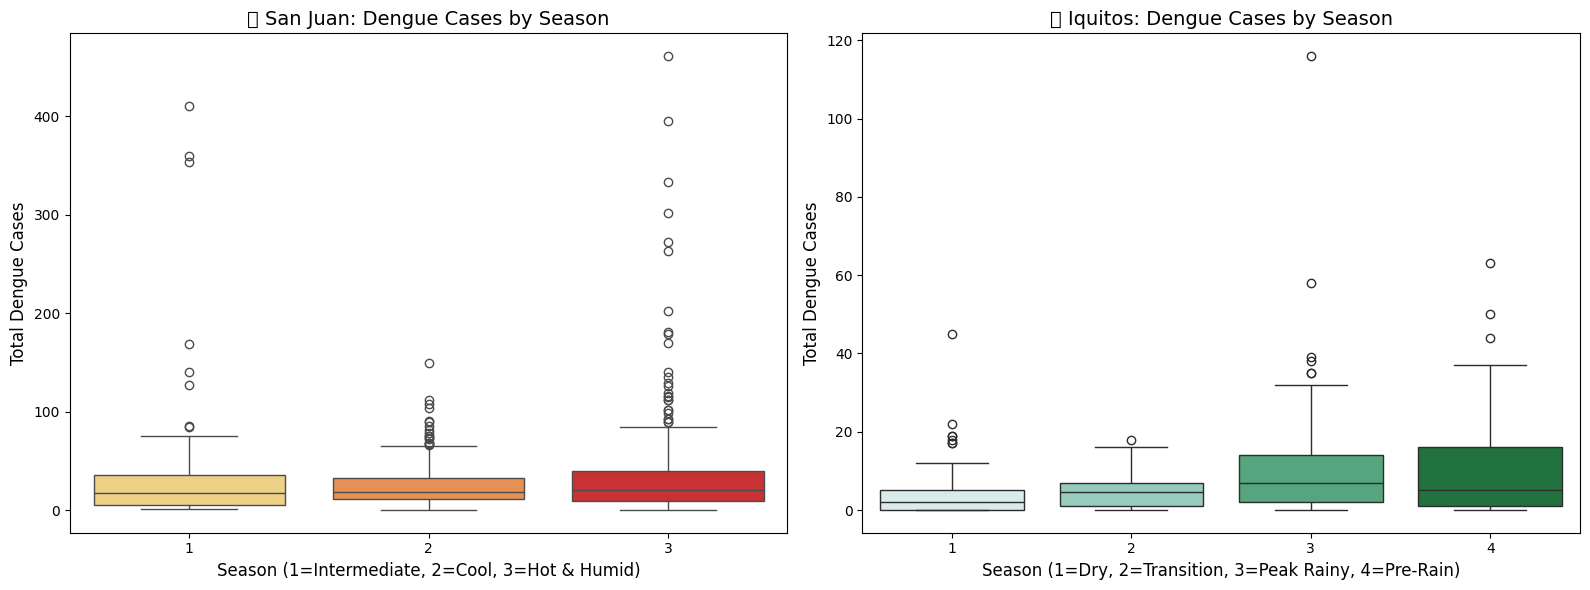

In [ ]:
# San Juan Season Mapping:
# May–October         → Hot & Humid Season       → Code 3
# December–March      → Cool Season              → Code 2
# April, November     → Intermediate Season      → Code 1
# Iquitos Season Mapping:
# December–March      → Peak Rainy Season        → Code 3
# April–May           → Transition Season        → Code 2
# June–September      → Dry Season               → Code 1
# October–November    → Pre-Rain Build-up        → Code 4
# --- Season Mapping Functions ---
def assign_sj_season(month):
    if 5 <= month <= 10:
        return 3  # Hot & Humid
    elif month in [12, 1, 2, 3]:
        return 2  # Cool
    else:
        return 1  # Intermediate

def assign_iq_season(month):
    if month in [12, 1, 2, 3]:
        return 3  # Peak Rainy
    elif month in [4, 5]:
        return 2  # Transition
    elif 6 <= month <= 9:
        return 1  # Dry
    else:
        return 4  # Pre-Rain Build-up

# Apply to datasets
sj_train['season'] = sj_train['month'].apply(assign_sj_season)
sj_test['season'] = sj_test['month'].apply(assign_sj_season)
sj_val['season'] = sj_val['month'].apply(assign_sj_season)

iq_train['season'] = iq_train['month'].apply(assign_iq_season)
iq_test['season'] = iq_test['month'].apply(assign_iq_season)
iq_val['season'] = iq_val['month'].apply(assign_iq_season)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# San Juan plot
sns.boxplot(ax=axes[0], x='season', y='total_cases', data=sj_train, palette='YlOrRd')
axes[0].set_title('🟥 San Juan: Dengue Cases by Season', fontsize=14)
axes[0].set_xlabel('Season (1=Intermediate, 2=Cool, 3=Hot & Humid)', fontsize=12)
axes[0].set_ylabel('Total Dengue Cases', fontsize=12)

# Iquitos plot
sns.boxplot(ax=axes[1], x='season', y='total_cases', data=iq_train, palette='BuGn')
axes[1].set_title('🟩 Iquitos: Dengue Cases by Season', fontsize=14)
axes[1].set_xlabel('Season (1=Dry, 2=Transition, 3=Peak Rainy, 4=Pre-Rain)', fontsize=12)
axes[1].set_ylabel('Total Dengue Cases', fontsize=12)

plt.tight_layout()
plt.show()


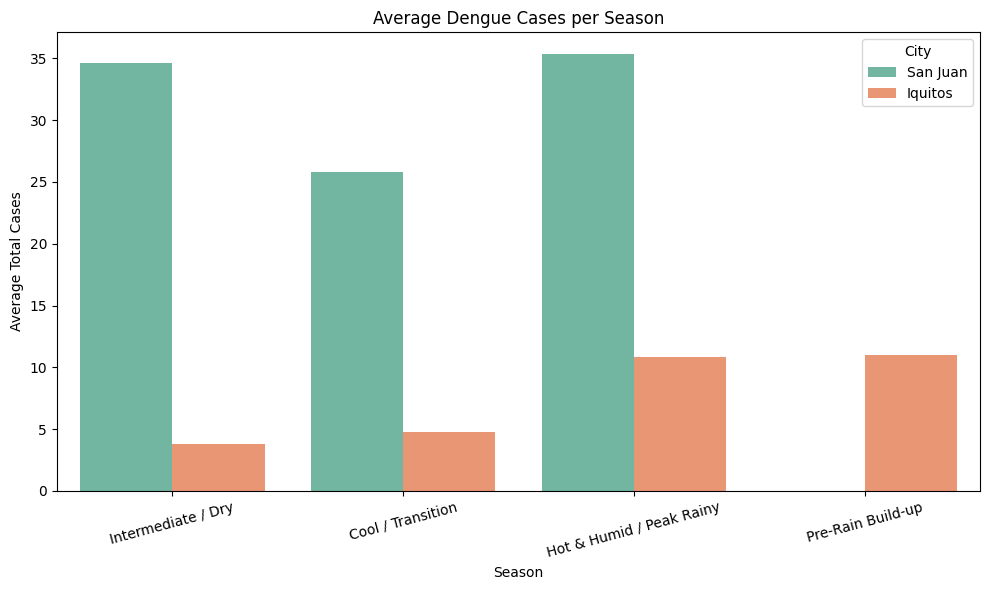


📊 Detailed Seasonal Summary:


,season,mean,sum,count,location
0,Intermediate / Dry,34.621622,3843,111,San Juan
1,Cool / Transition,25.831169,5967,231,San Juan
2,Hot & Humid / Peak Rainy,35.340361,11733,332,San Juan
0,Intermediate / Dry,3.818182,462,121,Iquitos
1,Cool / Transition,4.750000,266,56,Iquitos
2,Hot & Humid / Peak Rainy,10.806202,1394,129,Iquitos
3,Pre-Rain Build-up,10.983333,659,60,Iquitos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSVs (already uploaded in your Colab environment)
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

# Merge features and labels for training
train = pd.merge(train_features, train_labels)

# Split into training and validation using the size of the test set
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=len(test), random_state=42)

# Filter data by city
sj_train = train[train['city'] == 'sj'].copy()
sj_val = val[val['city'] == 'sj'].copy()
sj_test = test[test['city'] == 'sj'].copy()

iq_train = train[train['city'] == 'iq'].copy()
iq_val = val[val['city'] == 'iq'].copy()
iq_test = test[test['city'] == 'iq'].copy()

# Extract month from week_start_date
for df in [sj_train, sj_val, sj_test, iq_train, iq_val, iq_test]:
    df['month'] = pd.to_datetime(df['week_start_date']).dt.month

# ---------------------------------------
# ✅ Define Season Codes Based on Location
# ---------------------------------------

# ✅ San Juan (Puerto Rico)
# Month(s)         Season                  Code
# May–October      Hot & Humid             3
# December–March   Cool                    2
# April, November  Intermediate            1

def classify_sj_season(month):
    if 5 <= month <= 10:
        return 3  # Hot & Humid
    elif month in [12, 1, 2, 3]:
        return 2  # Cool
    else:
        return 1  # Intermediate

# ✅ Iquitos (Peru)
# Month(s)         Season                  Code
# Dec–Mar          Peak Rainy Season       3
# Apr–May          Transition Season       2
# Jun–Sep          Dry Season              1
# Oct–Nov          Pre-Rain Build-up       4

def classify_iq_season(month):
    if month in [12, 1, 2, 3]:
        return 3  # Peak Rainy
    elif month in [4, 5]:
        return 2  # Transition
    elif month in [6, 7, 8, 9]:
        return 1  # Dry
    else:
        return 4  # Pre-Rain Build-up

# Apply season classification
sj_train['season'] = sj_train['month'].apply(classify_sj_season)
sj_val['season'] = sj_val['month'].apply(classify_sj_season)
sj_test['season'] = sj_test['month'].apply(classify_sj_season)

iq_train['season'] = iq_train['month'].apply(classify_iq_season)
iq_val['season'] = iq_val['month'].apply(classify_iq_season)
iq_test['season'] = iq_test['month'].apply(classify_iq_season)

# ---------------------------------------
# 🧠 ANALYSIS: Seasonal vs Total Cases
# ---------------------------------------

# San Juan - Dengue Cases by Season
sj_seasonal = sj_train.groupby('season')['total_cases'].agg(['mean', 'sum', 'count']).reset_index()
sj_seasonal['location'] = 'San Juan'

# Iquitos - Dengue Cases by Season
iq_seasonal = iq_train.groupby('season')['total_cases'].agg(['mean', 'sum', 'count']).reset_index()
iq_seasonal['location'] = 'Iquitos'

# Combine for visualization
seasonal_df = pd.concat([sj_seasonal, iq_seasonal], axis=0)
seasonal_df['season'] = seasonal_df['season'].map({
    1: 'Intermediate / Dry',
    2: 'Cool / Transition',
    3: 'Hot & Humid / Peak Rainy',
    4: 'Pre-Rain Build-up'
})

# Plotting mean cases per season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_df, x='season', y='mean', hue='location', palette='Set2')
plt.title('Average Dengue Cases per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cases')
plt.legend(title='City')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Optional: Show the seasonal breakdown table
print("\n📊 Detailed Seasonal Summary:")
display(seasonal_df)



---- SJ ----
Random Forest MAE: 17.294236641221374
Ridge Regression MAE: 30.153775015937324

---- IQ ----
Random Forest MAE: 5.550324675324675
Ridge Regression MAE: 6.1471582971066585


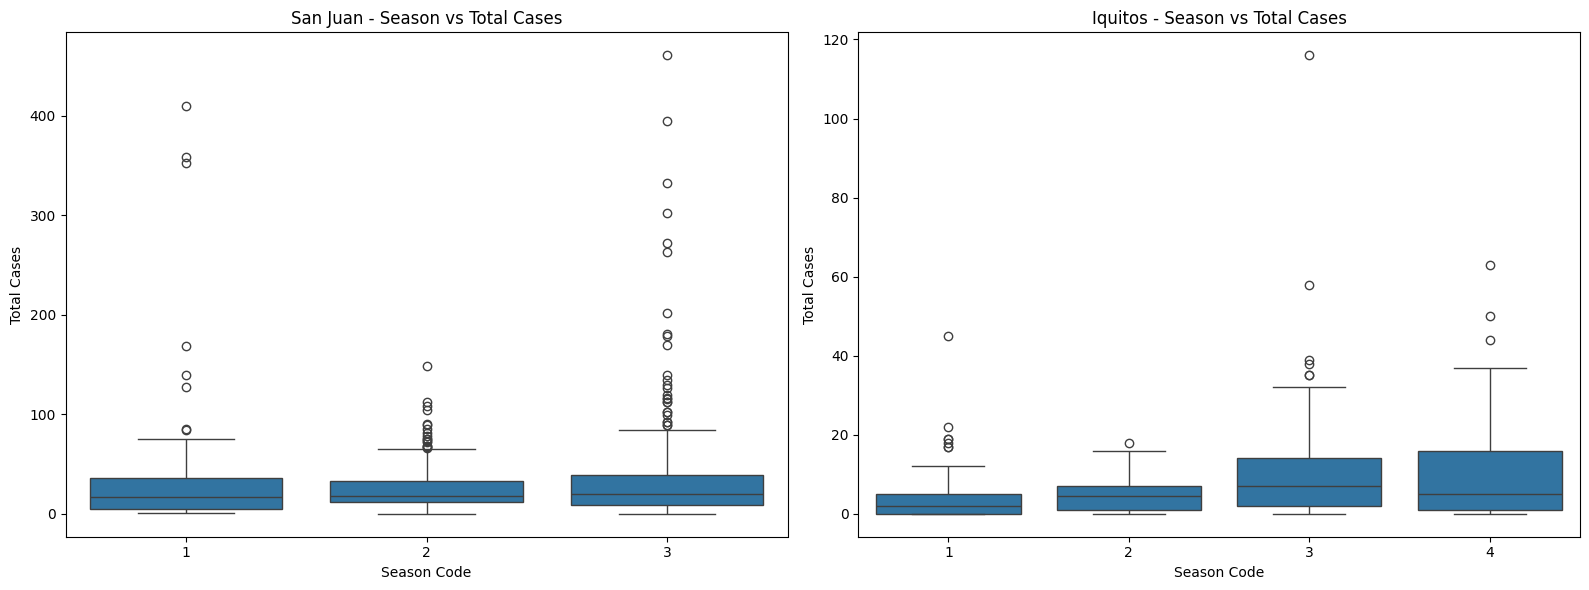

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load CSVs
features = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

# Merge training data
train = pd.merge(features, labels, on=['city', 'year', 'weekofyear'])

# Split training into train and validation
train, val = train_test_split(train, test_size=len(test), random_state=42)

# Extract month for season classification
for df in [train, val, test]:
    df['month'] = pd.to_datetime(df['week_start_date']).dt.month

# ----- Season Encoding -----
# For San Juan (Puerto Rico):
# May–October -> Hot & Humid (3)
# December–March -> Cool (2)
# April, November -> Intermediate (1)

# For Iquitos (Peru):
# Dec–Mar -> Peak Rainy (3), Apr–May -> Transition (2)
# Jun–Sep -> Dry (1), Oct–Nov -> Pre-Rain (4)

def encode_season(row):
    if row['city'] == 'sj':
        if 5 <= row['month'] <= 10:
            return 3
        elif row['month'] in [12, 1, 2, 3]:
            return 2
        else:
            return 1
    else:  # Iquitos
        if row['month'] in [12, 1, 2, 3]:
            return 3
        elif row['month'] in [4, 5]:
            return 2
        elif row['month'] in [6, 7, 8, 9]:
            return 1
        else:
            return 4

train['season'] = train.apply(encode_season, axis=1)
val['season'] = val.apply(encode_season, axis=1)
test['season'] = test.apply(encode_season, axis=1)

# ----- Feature Selection -----
features_columns = train.columns.drop(['city', 'week_start_date', 'total_cases'])

# Separate by city for modeling
def city_data(df, city):
    return df[df['city'] == city].copy()

sj_train = city_data(train, 'sj')
sj_val = city_data(val, 'sj')
sj_test = city_data(test, 'sj')

iq_train = city_data(train, 'iq')
iq_val = city_data(val, 'iq')
iq_test = city_data(test, 'iq')

# Imputation
def preprocess(X_train, X_val, X_test):
    imputer = SimpleImputer(strategy='mean')
    X_train_imp = imputer.fit_transform(X_train)
    X_val_imp = imputer.transform(X_val)
    X_test_imp = imputer.transform(X_test)
    return X_train_imp, X_val_imp, X_test_imp

# Model training & evaluation
def train_and_evaluate(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    return model, preds, mae

# Run for a city
def run_city_model(city_train, city_val, city_test):
    X_train = city_train[features_columns]
    y_train = city_train['total_cases']
    X_val = city_val[features_columns]
    y_val = city_val['total_cases']
    X_test = city_test[features_columns]

    X_train_imp, X_val_imp, X_test_imp = preprocess(X_train, X_val, X_test)

    print(f"\n---- {city_train.iloc[0]['city'].upper()} ----")

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model, rf_preds, rf_mae = train_and_evaluate(X_train_imp, y_train, X_val_imp, y_val, rf)
    print("Random Forest MAE:", rf_mae)

    ridge = Ridge(alpha=1.0)
    ridge_model, ridge_preds, ridge_mae = train_and_evaluate(X_train_imp, y_train, X_val_imp, y_val, ridge)
    print("Ridge Regression MAE:", ridge_mae)

    return rf_preds, ridge_preds

# Run models
sj_rf_preds, sj_ridge_preds = run_city_model(sj_train, sj_val, sj_test)
iq_rf_preds, iq_ridge_preds = run_city_model(iq_train, iq_val, iq_test)
# Boxplot to show seasonality impact
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='season', y='total_cases', data=sj_train, ax=axs[0])
axs[0].set_title("San Juan - Season vs Total Cases")
axs[0].set_xlabel("Season Code")
axs[0].set_ylabel("Total Cases")

sns.boxplot(x='season', y='total_cases', data=iq_train, ax=axs[1])
axs[1].set_title("Iquitos - Season vs Total Cases")
axs[1].set_xlabel("Season Code")
axs[1].set_ylabel("Total Cases")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the training and label datasets
features = pd.read_csv("dengue_features_train.csv")
labels = pd.read_csv("dengue_labels_train.csv")

# Merge to examine together
merged_df = pd.merge(features, labels, on=["city", "year", "weekofyear"])

# Check correlation of all features with the label 'total_cases'
correlations = merged_df.corr(numeric_only=True)["total_cases"].sort_values(ascending=False)

# Display the top 10 positively and negatively correlated features with 'total_cases'
top_positive_corr = correlations.head(11)  # include total_cases itself for context
top_negative_corr = correlations.tail(10)

top_positive_corr, top_negative_corr


(total_cases                              1.000000
 reanalysis_min_air_temp_k                0.325252
 station_min_temp_c                       0.267109
 reanalysis_air_temp_k                    0.264952
 weekofyear                               0.216452
 reanalysis_avg_temp_k                    0.151637
 reanalysis_dew_point_temp_k              0.142531
 reanalysis_specific_humidity_g_per_kg    0.129861
 station_avg_temp_c                       0.116109
 reanalysis_precip_amt_kg_per_m2         -0.010031
 reanalysis_sat_precip_amt_mm            -0.038740
 Name: total_cases, dtype: float64,
 station_precip_mm                      -0.074374
 reanalysis_relative_humidity_percent   -0.132452
 ndvi_se                                -0.168612
 reanalysis_max_air_temp_k              -0.191345
 ndvi_sw                                -0.196461
 ndvi_nw                                -0.202235
 station_diur_temp_rng_c                -0.237844
 ndvi_ne                                -0.241376
 re

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load the data
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
test_features = pd.read_csv("dengue_features_test.csv")

# Merge features and labels on common keys
train = pd.merge(train_features, train_labels, on=['city', 'year', 'weekofyear'])

# ===================== 1. Add Seasonality Label ===================== #
def add_season_column(df):
    df['month'] = pd.to_datetime(df['week_start_date']).dt.month
    conditions = []
    season_labels = []

    for idx, row in df.iterrows():
        city = row['city']
        month = row['month']

        # San Juan Season Logic
        if city == 'sj':
            if 5 <= month <= 10:
                season_labels.append(3)  # Hot & Humid
            elif month in [12, 1, 2, 3]:
                season_labels.append(2)  # Cool
            else:
                season_labels.append(1)  # Intermediate

        # Iquitos Season Logic
        elif city == 'iq':
            if month in [12, 1, 2, 3]:
                season_labels.append(3)  # Peak Rainy
            elif month in [4, 5]:
                season_labels.append(2)  # Transition
            elif month in [10, 11]:
                season_labels.append(4)  # Pre-Rain Build-up
            else:
                season_labels.append(1)  # Dry

    df['season'] = season_labels
    return df

train = add_season_column(train)
test_features = add_season_column(test_features)

# ===================== 2. Feature Selection ===================== #
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Fill missing values with median
train[selected_features] = train[selected_features].fillna(train[selected_features].median())
test_features[selected_features] = test_features[selected_features].fillna(test_features[selected_features].median())

X = train[selected_features]
y = train['total_cases']
X_test_final = test_features[selected_features]

# ===================== 3. Model Training and Evaluation ===================== #
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
results['Random Forest MAE'] = mean_absolute_error(y_val, rf_preds)

# XGBoost
xgb = XGBRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)
results['XGBoost MAE'] = mean_absolute_error(y_val, xgb_preds)

# Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_val_scaled)
results['Ridge Regression MAE'] = mean_absolute_error(y_val, ridge_preds)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_val_scaled)
results['Lasso Regression MAE'] = mean_absolute_error(y_val, lasso_preds)

# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_val)
results['Gradient Boosting MAE'] = mean_absolute_error(y_val, gbr_preds)

results


{'Random Forest MAE': 20.50187709284627,
 'XGBoost MAE': 21.416763305664062,
 'Ridge Regression MAE': 24.705509664298837,
 'Lasso Regression MAE': 24.665256327505624,
 'Gradient Boosting MAE': 21.147608854377005}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to evaluate all models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f" {name} Evaluation:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  MSE  : {mse:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print("")

# Evaluate all models
evaluate_model("Random Forest", y_val, rf_preds)
evaluate_model("XGBoost", y_val, xgb_preds)
evaluate_model("Ridge Regression", y_val, ridge_preds)
evaluate_model("Lasso Regression", y_val, lasso_preds)
evaluate_model("Gradient Boosting", y_val, gbr_preds)


 Random Forest Evaluation:
  MAE  : 20.5019
  MSE  : 2331.7571
  RMSE : 48.2883
  R²   : 0.2736

 XGBoost Evaluation:
  MAE  : 21.4168
  MSE  : 2529.3123
  RMSE : 50.2923
  R²   : 0.2121

 Ridge Regression Evaluation:
  MAE  : 24.7055
  MSE  : 2803.5913
  RMSE : 52.9489
  R²   : 0.1266

 Lasso Regression Evaluation:
  MAE  : 24.6653
  MSE  : 2809.9585
  RMSE : 53.0090
  R²   : 0.1247

 Gradient Boosting Evaluation:
  MAE  : 21.1476
  MSE  : 2489.3629
  RMSE : 49.8935
  R²   : 0.2245



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Sample model predictions and true values
# Replace these with your actual model predictions
# e.g., y_val, rf_preds, xgb_preds, etc.

# Assuming you have these variables already:
# y_val, rf_preds, xgb_preds, ridge_preds, lasso_preds, gbr_preds

# Define the evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Chi-square test: use histogram binning
    observed, bins = np.histogram(y_true, bins=5)
    expected, _ = np.histogram(y_pred, bins=bins)

    # Scale expected to match observed sum
    expected = expected * (observed.sum() / expected.sum())

    # Avoid zero values in expected (to prevent divide-by-zero)
    expected = np.where(expected == 0, 1e-6, expected)

    chi2, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

    return {
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "R²": round(r2, 4),
        "Chi²": round(chi2, 4),
        "p-value": round(p_val, 4)
    }

# Evaluate all models and store results
results = []
results.append(evaluate_model("Random Forest", y_val, rf_preds))
results.append(evaluate_model("XGBoost", y_val, xgb_preds))
results.append(evaluate_model("Ridge Regression", y_val, ridge_preds))
results.append(evaluate_model("Lasso Regression", y_val, lasso_preds))
results.append(evaluate_model("Gradient Boosting", y_val, gbr_preds))

# Create DataFrame for all results
evaluation_df = pd.DataFrame(results)

# Print nicely formatted table
print(evaluation_df)

# Optional: export to CSV
evaluation_df.to_csv("model_evaluation_results.csv", index=False)


               Model      MAE        MSE     RMSE      R²          Chi²  \
0      Random Forest  20.5019  2331.7571  48.2883  0.2736  1.799999e+07   
1            XGBoost  21.4168  2529.3123  50.2923  0.2121  9.000011e+06   
2   Ridge Regression  24.7055  2803.5913  52.9489  0.1266  1.960000e+08   
3   Lasso Regression  24.6653  2809.9585  53.0090  0.1247  1.960000e+08   
4  Gradient Boosting  21.1476  2489.3629  49.8935  0.2245  2.699999e+07   

   p-value  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load the data
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
test_features = pd.read_csv("dengue_features_test.csv")

# Merge features and labels on common keys
train = pd.merge(train_features, train_labels, on=['city', 'year', 'weekofyear'])

# ===================== 1. Add Seasonality Label ===================== #
def add_season_column(df):
    df['month'] = pd.to_datetime(df['week_start_date']).dt.month
    conditions = []
    season_labels = []

    for idx, row in df.iterrows():
        city = row['city']
        month = row['month']

        # San Juan Season Logic
        if city == 'sj':
            if 5 <= month <= 10:
                season_labels.append(3)  # Hot & Humid
            elif month in [12, 1, 2, 3]:
                season_labels.append(2)  # Cool
            else:
                season_labels.append(1)  # Intermediate

        # Iquitos Season Logic
        elif city == 'iq':
            if month in [12, 1, 2, 3]:
                season_labels.append(3)  # Peak Rainy
            elif month in [4, 5]:
                season_labels.append(2)  # Transition
            elif month in [10, 11]:
                season_labels.append(4)  # Pre-Rain Build-up
            else:
                season_labels.append(1)  # Dry

    df['season'] = season_labels
    return df

train = add_season_column(train)
test_features = add_season_column(test_features)

# ===================== 2. Calculate Moving Average of Cases ===================== #
def calculate_moving_average(df, window_size=4, is_train=True):
    if is_train:
        # Calculate rolling mean (moving average) of total_cases by city and month for the train dataset
        df['moving_avg'] = df.groupby(['city', 'month'])['total_cases'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    else:
        # For the test dataset, we cannot use total_cases, so we compute the moving average
        # without 'total_cases'. We use the month and city to compute a rolling mean for test data.
        df['moving_avg'] = df.groupby(['city', 'month'])['weekofyear'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return df

# Calculate moving averages for the train and test datasets
train = calculate_moving_average(train, is_train=True)
test_features = calculate_moving_average(test_features, is_train=False)

# ===================== 3. Feature Selection ===================== #
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season', 'moving_avg'
]

# Fill missing values with median
train[selected_features] = train[selected_features].fillna(train[selected_features].median())
test_features[selected_features] = test_features[selected_features].fillna(test_features[selected_features].median())

X = train[selected_features]
y = train['total_cases']
X_test_final = test_features[selected_features]

# ===================== 4. Model Training and Evaluation ===================== #
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
results['Random Forest MAE'] = mean_absolute_error(y_val, rf_preds)

# XGBoost
xgb = XGBRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)
results['XGBoost MAE'] = mean_absolute_error(y_val, xgb_preds)

# Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_val_scaled)
results['Ridge Regression MAE'] = mean_absolute_error(y_val, ridge_preds)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_val_scaled)
results['Lasso Regression MAE'] = mean_absolute_error(y_val, lasso_preds)

# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_val)
results['Gradient Boosting MAE'] = mean_absolute_error(y_val, gbr_preds)

# Display results
print("Model Results:")
for model, mae in results.items():
    print(f"{model}: {mae}")


Model Results:
Random Forest MAE: 13.398675799086757
XGBoost MAE: 15.058767318725586
Ridge Regression MAE: 11.981363226675215
Lasso Regression MAE: 12.03698100549872
Gradient Boosting MAE: 13.043960737084808


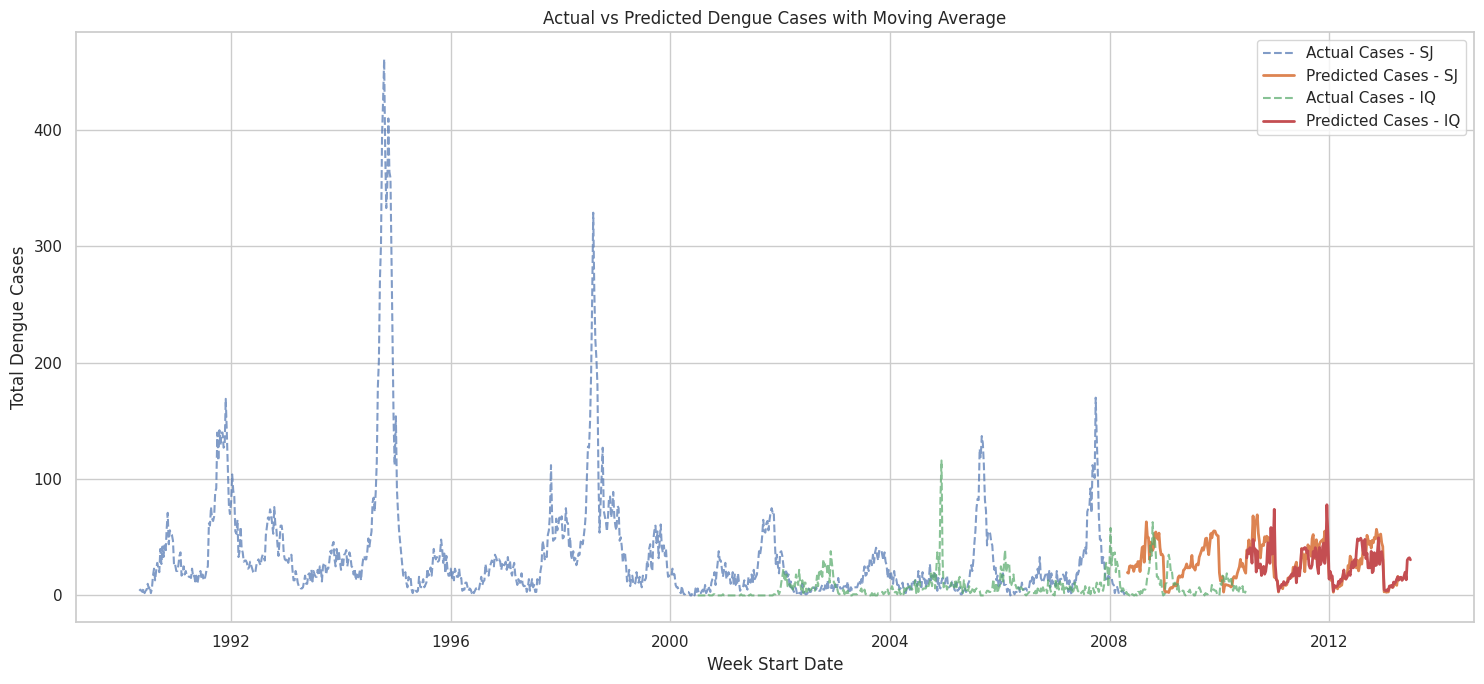

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date column
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season labels
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month

    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Extract the month from week_start_date
train_data['month'] = train_data['week_start_date'].dt.month
features_test['month'] = features_test['week_start_date'].dt.month

# Calculate 4-week moving average of total_cases by city and month for training data
train_data['moving_avg'] = train_data.groupby(['city', 'month'])['total_cases'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean())

# Calculate 4-week moving average for test data (no target column in test set)
features_test['moving_avg'] = features_test.groupby(['city', 'month'])['weekofyear'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean())

# Define features (adding moving average as a feature)
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season', 'moving_avg'
]

# Initialize list to store predictions
all_predictions = []
all_actuals = []

for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city].copy()
    city_test = features_test[features_test['city'] == city].copy()

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_test = imputer.transform(city_test[feature_cols])

    # Train and predict
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Add predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

    # Add actuals
    city_train['week_start_date'] = pd.to_datetime(city_train['week_start_date'])
    all_actuals.append(city_train[['city', 'week_start_date', 'total_cases']])

# Combine all predictions and actuals
final_pred = pd.concat(all_predictions)
final_actual = pd.concat(all_actuals)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

for city in ['sj', 'iq']:
    pred_data = final_pred[final_pred['city'] == city]
    actual_data = final_actual[final_actual['city'] == city]

    plt.plot(actual_data['week_start_date'], actual_data['total_cases'],
             label=f"Actual Cases - {city.upper()}", linestyle='--', alpha=0.7)
    plt.plot(pred_data['week_start_date'], pred_data['predicted_cases'],
             label=f"Predicted Cases - {city.upper()}", linewidth=2)

plt.title("Actual vs Predicted Dengue Cases with Moving Average")
plt.xlabel("Week Start Date")
plt.ylabel("Total Dengue Cases")
plt.legend()
plt.tight_layout()
plt.show()


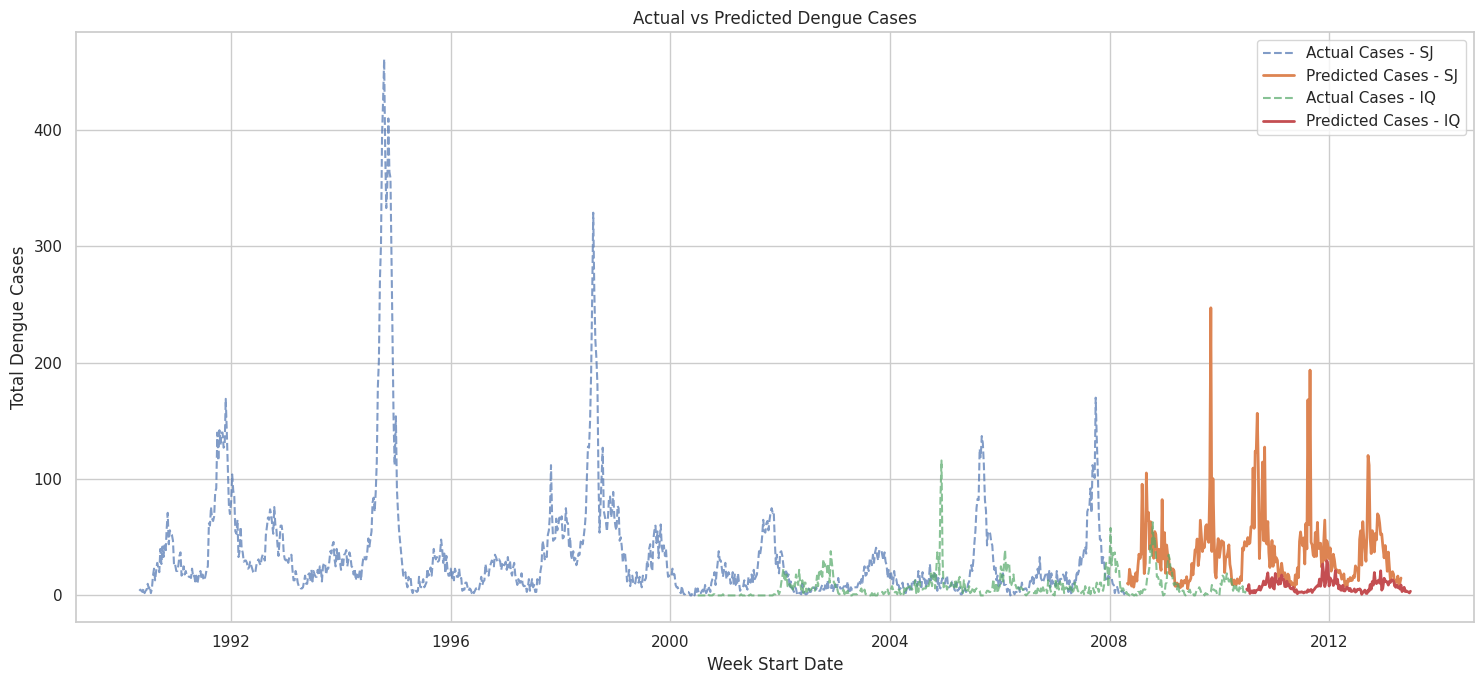

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date column
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season labels
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month

    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Define features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Initialize list to store predictions
all_predictions = []
all_actuals = []

for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city].copy()
    city_test = features_test[features_test['city'] == city].copy()

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_test = imputer.transform(city_test[feature_cols])

    # Train and predict
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Add predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

    # Add actuals
    city_train['week_start_date'] = pd.to_datetime(city_train['week_start_date'])
    all_actuals.append(city_train[['city', 'week_start_date', 'total_cases']])

# Combine all predictions and actuals
final_pred = pd.concat(all_predictions)
final_actual = pd.concat(all_actuals)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

for city in ['sj', 'iq']:
    pred_data = final_pred[final_pred['city'] == city]
    actual_data = final_actual[final_actual['city'] == city]

    plt.plot(actual_data['week_start_date'], actual_data['total_cases'],
             label=f"Actual Cases - {city.upper()}", linestyle='--', alpha=0.7)
    plt.plot(pred_data['week_start_date'], pred_data['predicted_cases'],
             label=f"Predicted Cases - {city.upper()}", linewidth=2)

plt.title("Actual vs Predicted Dengue Cases")
plt.xlabel("Week Start Date")
plt.ylabel("Total Dengue Cases")
plt.legend()
plt.tight_layout()
plt.show()


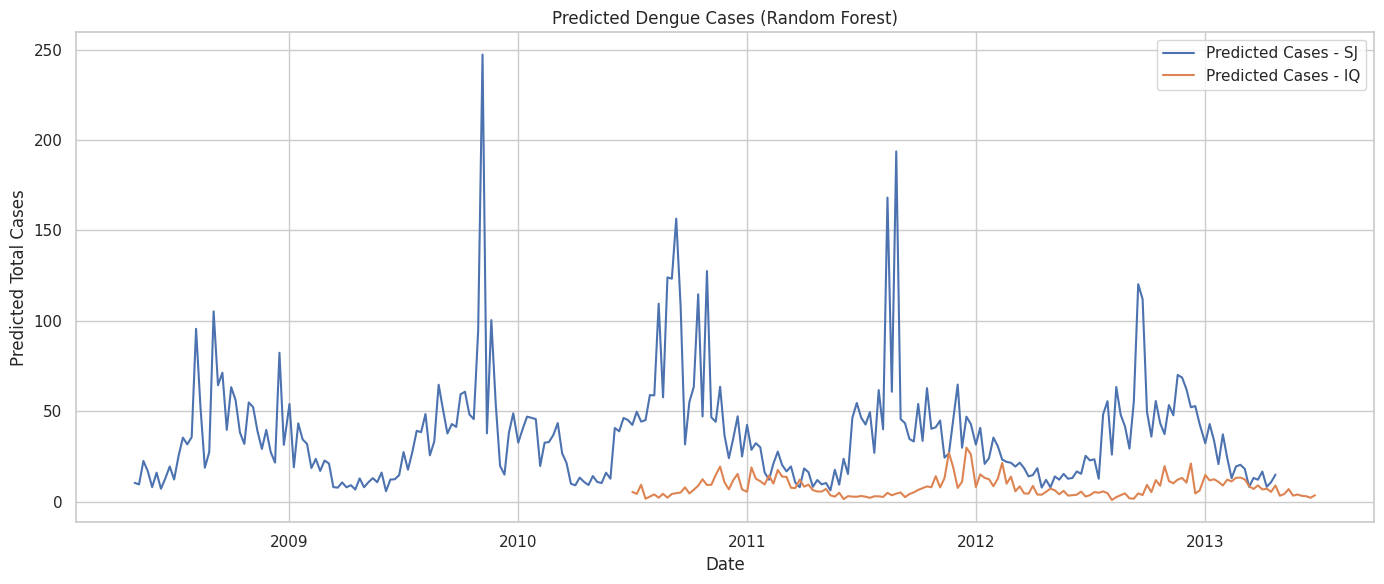

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date column
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season labels
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month

    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Define features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Initialize list to store plots
all_predictions = []

for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_test = imputer.transform(city_test[feature_cols])

    # Train and predict
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Create prediction DataFrame
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine all predictions
final_df = pd.concat(all_predictions)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted Cases - {city.upper()}")

plt.title("Predicted Dengue Cases (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


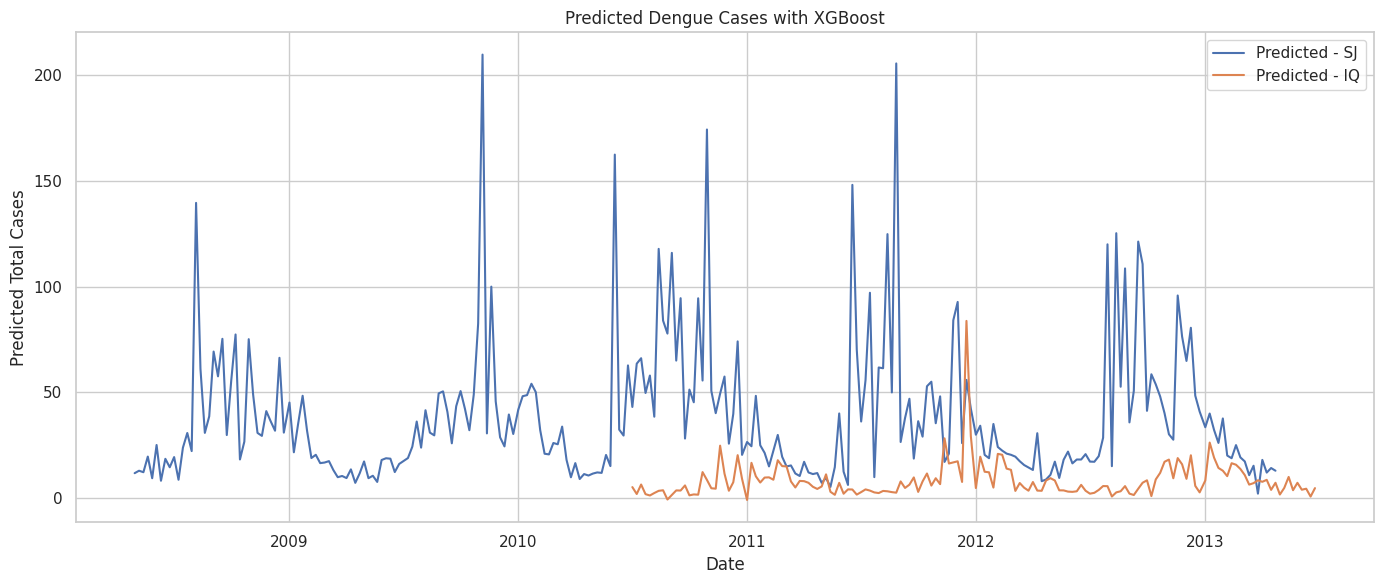

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Load datasets
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date column to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Define season logic based on city and month
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply season
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge labels with training features
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Define features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store predictions for plotting
all_predictions = []

# Loop through each city
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align test columns with training
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_test = imputer.transform(city_test[feature_cols])

    # Train XGBoost model
    xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
    xgb.fit(X_train, y_train)

    # Predict
    y_pred = xgb.predict(X_test)

    # Store predictions with date
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine all city predictions
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}")

plt.title("Predicted Dengue Cases with XGBoost")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


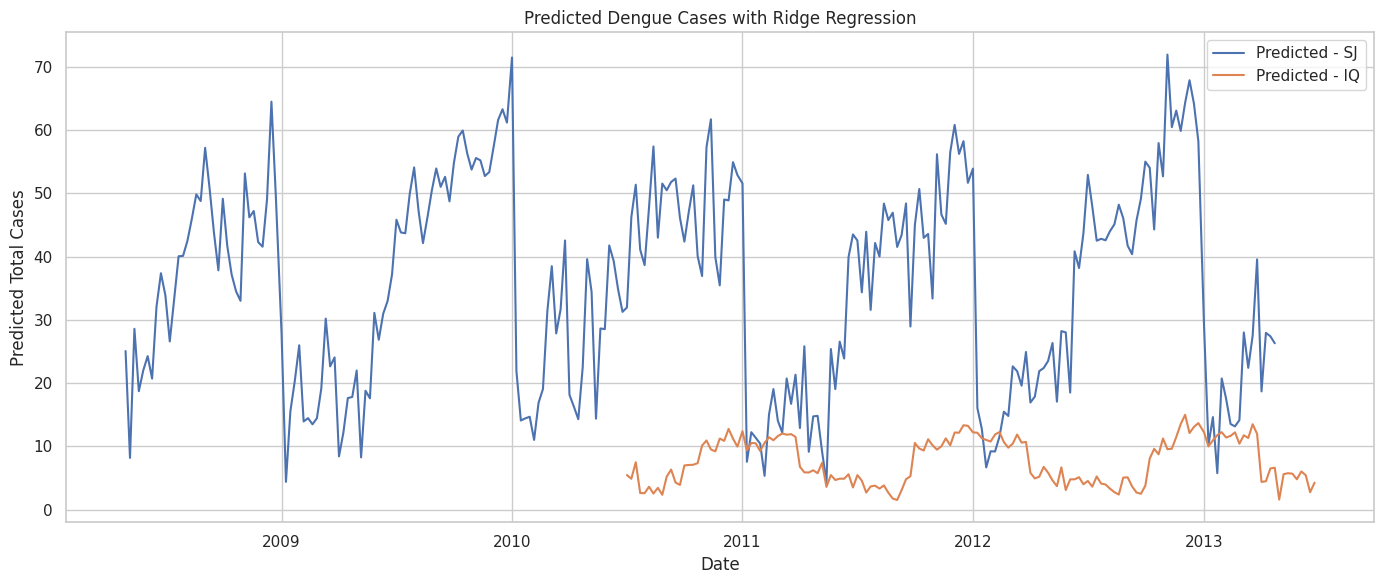

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Feature set
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store results for plotting
all_predictions = []

# Loop through cities
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode 'season'
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align test set columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_train = scaler.fit_transform(X_train)

    X_test = imputer.transform(city_test[feature_cols])
    X_test = scaler.transform(X_test)

    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    # Save predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine and plot
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}")

plt.title("Predicted Dengue Cases with Ridge Regression")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


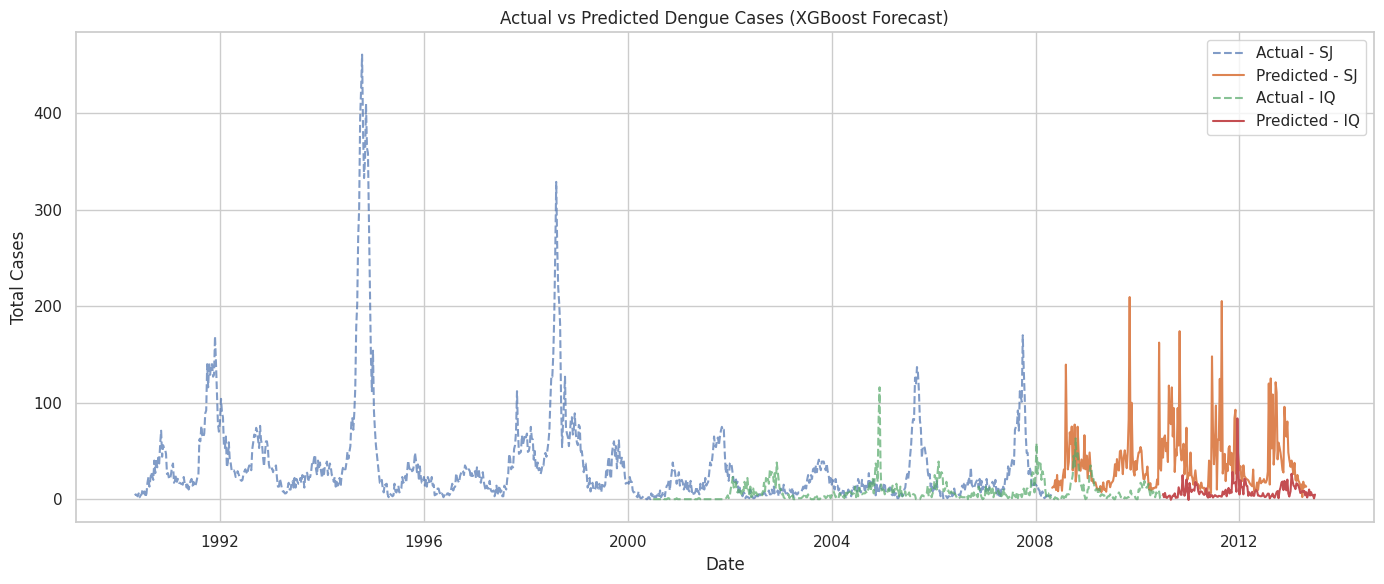

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Load datasets
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date columns to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Define custom season based on city and month
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply season
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training features and labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Feature list
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store predictions for both cities
all_predictions = []

# Loop over both cities
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode seasons
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align test columns with train
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_test = imputer.transform(city_test[feature_cols])

    # Train XGBoost model
    xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
    xgb.fit(X_train, y_train)

    # Predict on test
    y_pred = xgb.predict(X_test)

    # Store predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine all predictions
final_df = pd.concat(all_predictions)

# Actual training data for plotting
actuals_plot_data = train_data[['city', 'week_start_date', 'total_cases']]

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

for city in ['sj', 'iq']:
    # Predicted values
    city_preds = final_df[final_df['city'] == city]

    # Actual values
    city_actuals = actuals_plot_data[actuals_plot_data['city'] == city]

    # Plot actual values
    plt.plot(city_actuals['week_start_date'], city_actuals['total_cases'],
             label=f"Actual - {city.upper()}", linestyle='--', alpha=0.7)

    # Plot predicted values
    plt.plot(city_preds['week_start_date'], city_preds['predicted_cases'],
             label=f"Predicted - {city.upper()}")

# Final plot labels
plt.title("Actual vs Predicted Dengue Cases (XGBoost Forecast)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


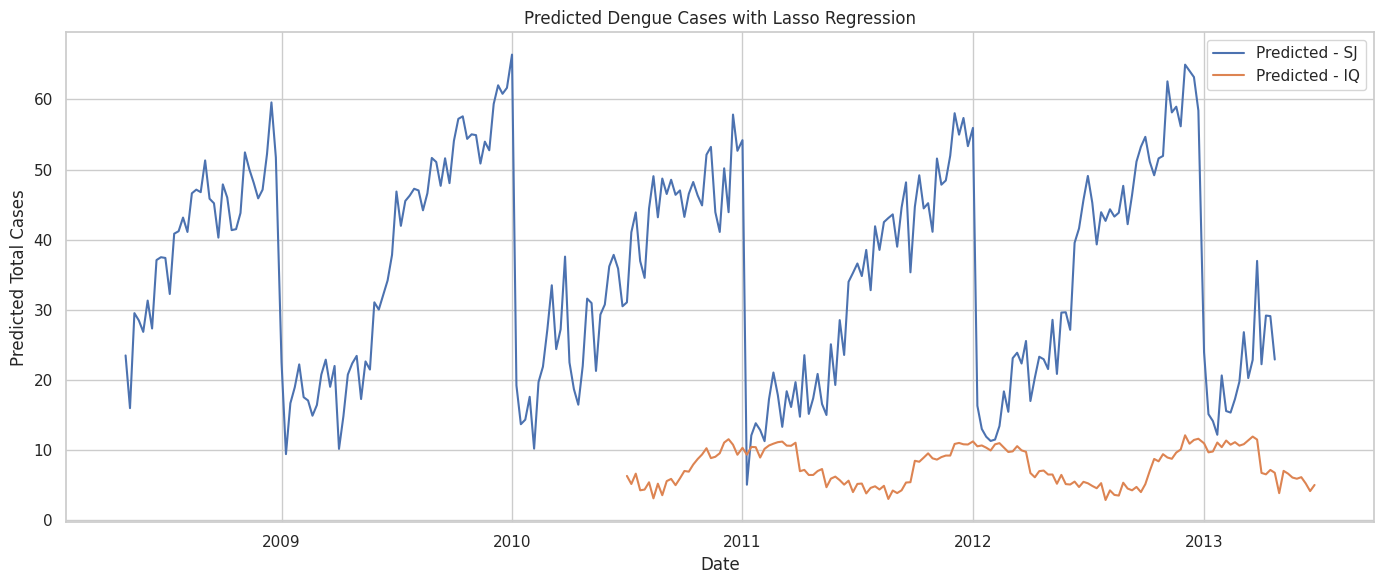

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply season
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training features and labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Select features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store all predictions
all_predictions = []

# Loop through each city
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align test columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_train = scaler.fit_transform(X_train)

    X_test = imputer.transform(city_test[feature_cols])
    X_test = scaler.transform(X_test)

    # Train Lasso model
    lasso = Lasso(alpha=0.5, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    # Store predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine predictions
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}")

plt.title("Predicted Dengue Cases with Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


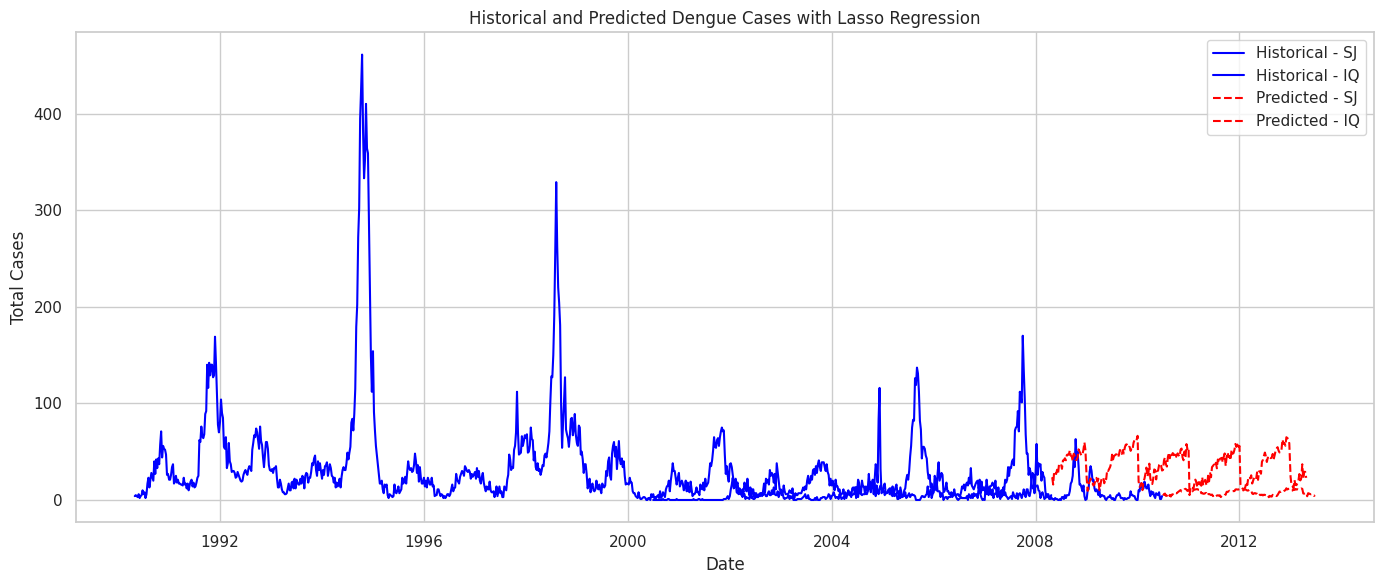

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply season
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge training features and labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Select features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store all predictions
all_predictions = []

# Loop through each city
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align test columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Impute missing values and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_train = scaler.fit_transform(X_train)

    X_test = imputer.transform(city_test[feature_cols])
    X_test = scaler.transform(X_test)

    # Train Lasso model
    lasso = Lasso(alpha=0.5, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    # Store predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine predictions
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot historical data (training data) for both cities
for city in ['sj', 'iq']:
    city_train_data = train_data[train_data['city'] == city]
    plt.plot(city_train_data['week_start_date'], city_train_data['total_cases'], label=f"Historical - {city.upper()}", linestyle='-', color='blue')

# Plot forecasted data (predicted cases)
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}", linestyle='--', color='red')

plt.title("Historical and Predicted Dengue Cases with Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


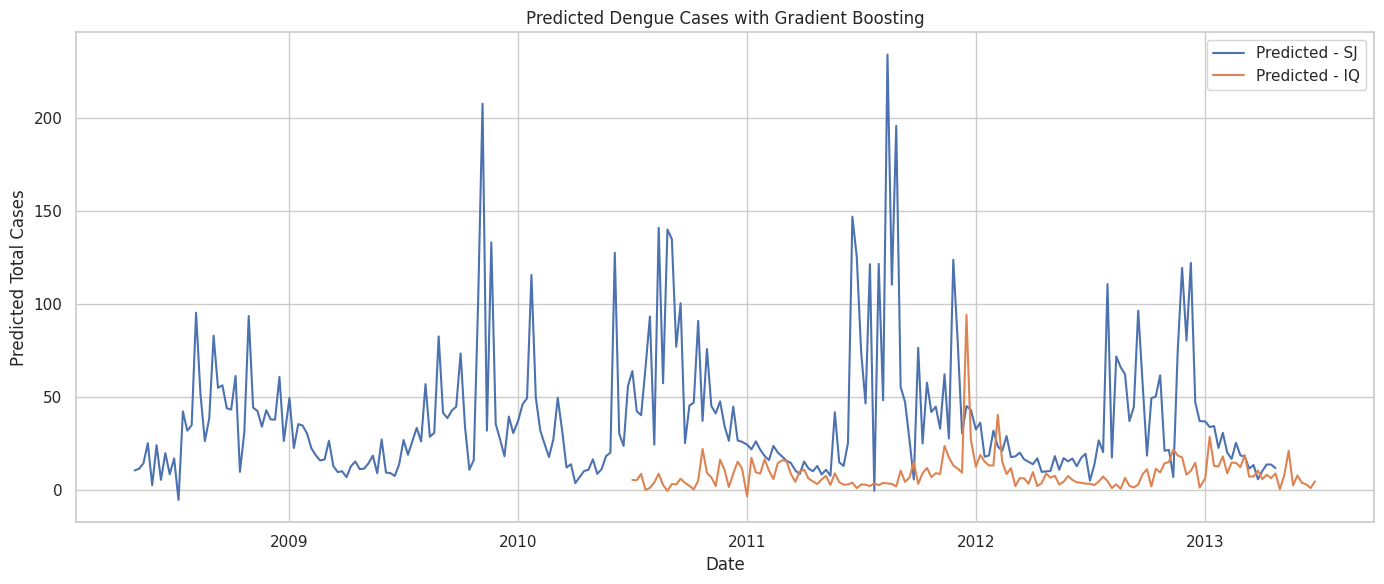

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season based on city/month
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply to both datasets
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Select features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store predictions
all_predictions = []

# Loop for each city
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Preprocess: impute and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_train = scaler.fit_transform(X_train)

    X_test = imputer.transform(city_test[feature_cols])
    X_test = scaler.transform(X_test)

    # Train Gradient Boosting model
    gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    # Store predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine all predictions
final_df = pd.concat(all_predictions)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}")

plt.title("Predicted Dengue Cases with Gradient Boosting")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


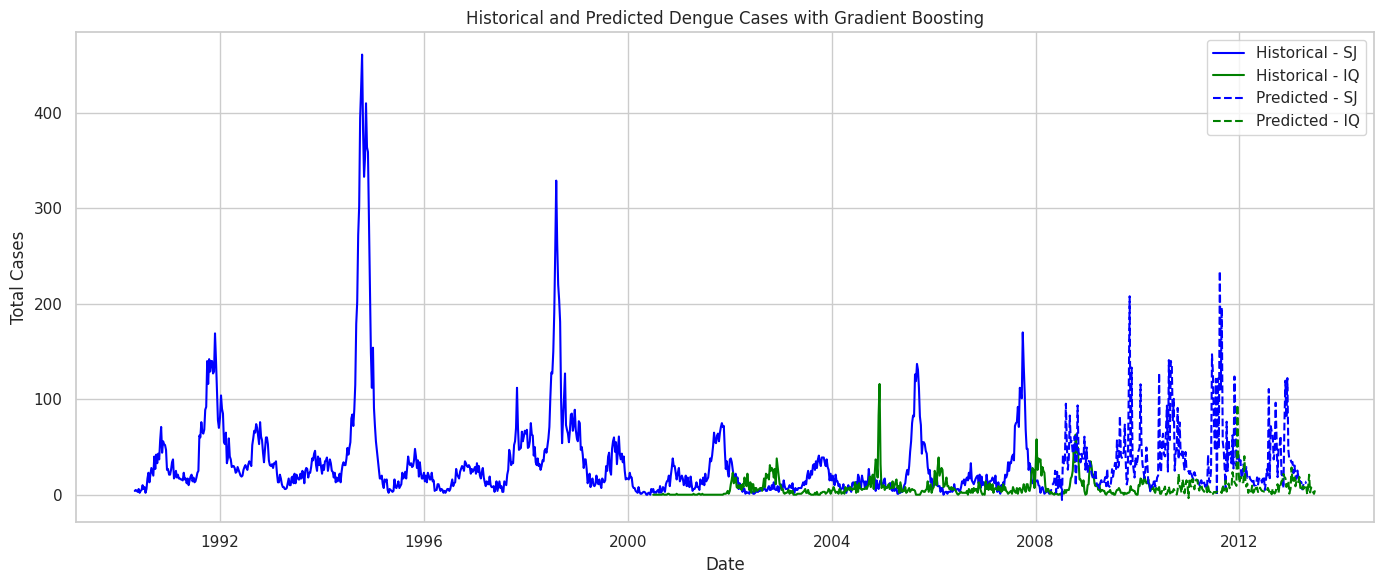

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert to datetime
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Assign season based on city/month
def assign_custom_season(row):
    city = row['city']
    month = row['week_start_date'].month
    if city == 'sj':
        if 5 <= month <= 10:
            return 3  # Hot & Humid
        elif month in [12, 1, 2, 3]:
            return 2  # Cool
        else:
            return 1  # Intermediate
    elif city == 'iq':
        if month in [12, 1, 2, 3]:
            return 3  # Peak Rainy
        elif month in [4, 5]:
            return 2  # Transition
        elif month in [10, 11]:
            return 4  # Pre-Rain Build-up
        else:
            return 1  # Dry

# Apply to both datasets
features_train['season'] = features_train.apply(assign_custom_season, axis=1)
features_test['season'] = features_test.apply(assign_custom_season, axis=1)

# Merge labels
train_data = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Select features
selected_features = [
    'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_air_temp_k',
    'weekofyear', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'season'
]

# Store predictions
all_predictions = []

# Define a color palette for different cities
city_colors = {'sj': 'blue', 'iq': 'green'}

# Loop for each city
for city in ['sj', 'iq']:
    city_train = train_data[train_data['city'] == city]
    city_test = features_test[features_test['city'] == city]

    # One-hot encode season
    city_train = pd.get_dummies(city_train, columns=['season'], prefix='season', drop_first=True)
    city_test = pd.get_dummies(city_test, columns=['season'], prefix='season', drop_first=True)

    # Align columns
    city_test = city_test.reindex(columns=city_train.columns.drop('total_cases'), fill_value=0)
    feature_cols = [col for col in city_train.columns if col in selected_features or col.startswith("season_")]

    # Preprocess: impute and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    X_train = imputer.fit_transform(city_train[feature_cols])
    y_train = city_train['total_cases']
    X_train = scaler.fit_transform(X_train)

    X_test = imputer.transform(city_test[feature_cols])
    X_test = scaler.transform(X_test)

    # Train Gradient Boosting model
    gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    # Store predictions
    city_test['predicted_cases'] = y_pred
    city_test['week_start_date'] = pd.to_datetime(city_test['week_start_date'])
    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine all predictions
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot historical data (training data) for both cities with unique colors
for city in ['sj', 'iq']:
    city_train_data = train_data[train_data['city'] == city]
    plt.plot(city_train_data['week_start_date'], city_train_data['total_cases'], label=f"Historical - {city.upper()}", linestyle='-', color=city_colors[city])

# Plot forecasted data (predicted cases) for both cities with unique colors
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}", linestyle='--', color=city_colors[city])

plt.title("Historical and Predicted Dengue Cases with Gradient Boosting")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-37-fbdd664a793a>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train = y_train.fillna(method='ffill')
<ipython-input-37-fbdd664a793a>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train = y_train.fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


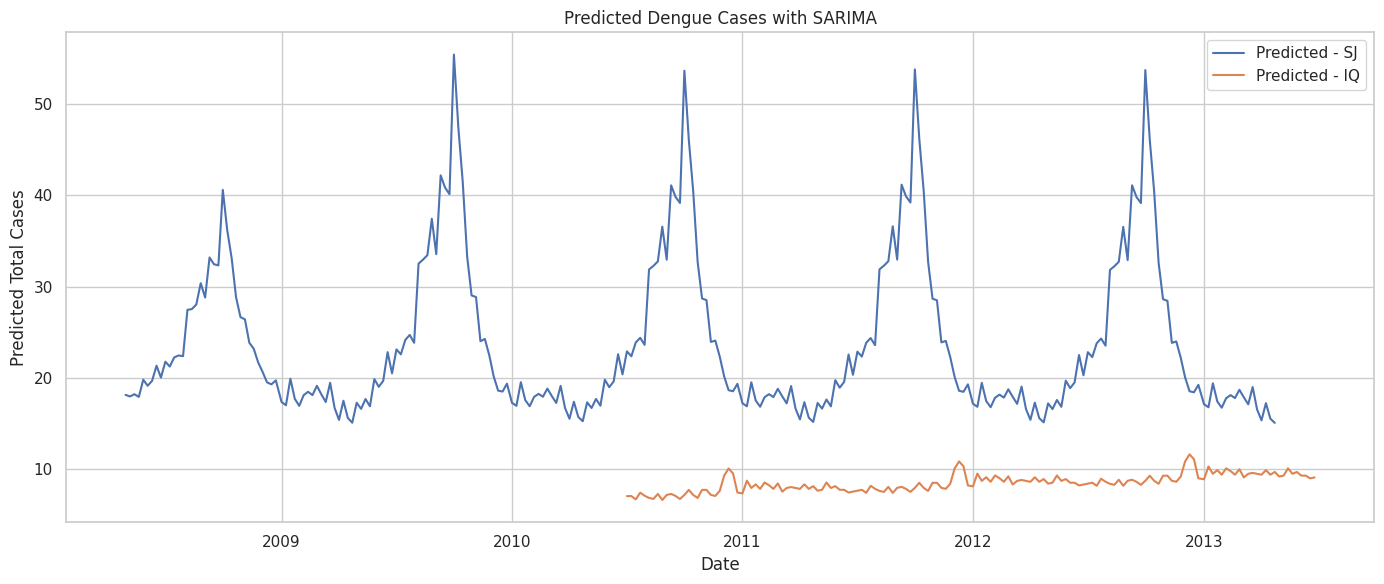

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")
features_test = pd.read_csv("dengue_features_test.csv")

# Convert date
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# Merge training data
train_df = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

# Combine test data with predictions
all_predictions = []

for city in ['sj', 'iq']:
    city_train = train_df[train_df['city'] == city].copy()
    city_test = features_test[features_test['city'] == city].copy()

    city_train.set_index('week_start_date', inplace=True)
    city_test.set_index('week_start_date', inplace=True)

    y_train = city_train['total_cases'].asfreq('W-MON')  # Ensure proper frequency

    # Fill missing values if any (SARIMA needs complete series)
    y_train = y_train.fillna(method='ffill')

    # Fit SARIMA (parameters can be tuned; these are defaults to start)
    model = SARIMAX(
        y_train,
        order=(2, 1, 2),              # ARIMA order

        seasonal_order=(1, 1, 1, 52), # Seasonality (weekly data, yearly cycle)
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    results = model.fit(disp=False)

    # Forecast ahead as long as test set
    forecast_steps = len(city_test)
    forecast = results.forecast(steps=forecast_steps)

    # Prepare results
    city_test = city_test.copy()
    city_test['predicted_cases'] = forecast.values
    city_test['city'] = city
    city_test.reset_index(inplace=True)

    all_predictions.append(city_test[['city', 'week_start_date', 'predicted_cases']])

# Combine predictions
final_df = pd.concat(all_predictions)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
for city in ['sj', 'iq']:
    city_data = final_df[final_df['city'] == city]
    plt.plot(city_data['week_start_date'], city_data['predicted_cases'], label=f"Predicted - {city.upper()}")

plt.title("Predicted Dengue Cases with SARIMA")
plt.xlabel("Date")
plt.ylabel("Predicted Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from datetime import datetime

# Load datasets
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')

# Merge labels into train data
train_data = pd.merge(train_features, train_labels, on=["city", "year", "weekofyear"])

# Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_features.fillna(method='ffill', inplace=True)

# Parse date and add useful time features
for df in [train_data, test_features]:
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])
    df['month'] = df['week_start_date'].dt.month
    df['quarter'] = df['week_start_date'].dt.quarter

# Features to use
feature_cols = [col for col in train_data.columns if col not in ['city', 'year', 'weekofyear', 'week_start_date', 'total_cases']]

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Chi-squared (bin-based)
    observed, bins = np.histogram(y_true, bins=5)
    expected, _ = np.histogram(y_pred, bins=bins)
    expected = expected * (observed.sum() / expected.sum())
    expected = np.where(expected == 0, 1e-6, expected)  # avoid divide-by-zero
    chi2, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

    return {
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "R²": round(r2, 4),
        "Chi²": round(chi2, 4),
        "p-value": round(p_val, 4)
    }

# Models dictionary
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Forecast + Evaluation container
predictions = []
evaluations = []

# Get unique years to loop over
last_train_year = train_data['year'].max()
forecast_years = [last_train_year + i for i in range(1, 4)]
cities = train_data['city'].unique()

# Forecasting loop
for city in cities:
    city_train = train_data[train_data['city'] == city]
    city_test = test_features[test_features['city'] == city]

    # Train on all available data
    X_train = city_train[feature_cols]
    y_train = city_train['total_cases']

    # Preprocess
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Prepare test data for prediction years
    future_data = city_test[city_test['year'].isin(forecast_years)]
    X_future = future_data[feature_cols]
    X_future_scaled = scaler.transform(X_future)

    for model_name, model in models.items():
        # Fit
        model.fit(X_train_scaled, y_train)

        # Predict
        preds = model.predict(X_future_scaled)
        preds = np.round(np.clip(preds, 0, None)).astype(int)  # no negative cases

        # Save predictions
        forecast_df = future_data[['city', 'year', 'weekofyear']].copy()
        forecast_df['predicted_cases'] = preds
        forecast_df['model'] = model_name
        predictions.append(forecast_df)

# Combine all predictions
final_predictions = pd.concat(predictions).reset_index(drop=True)
final_predictions.to_csv("forecast_3yr_all_models.csv", index=False)

print("✅ Forecasting completed and saved.")


<ipython-input-38-6461bc232eaa>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-38-6461bc232eaa>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_features.fillna(method='ffill', inplace=True)


✅ Forecasting completed and saved.


In [ ]:
!pip install category_encoders xgboost

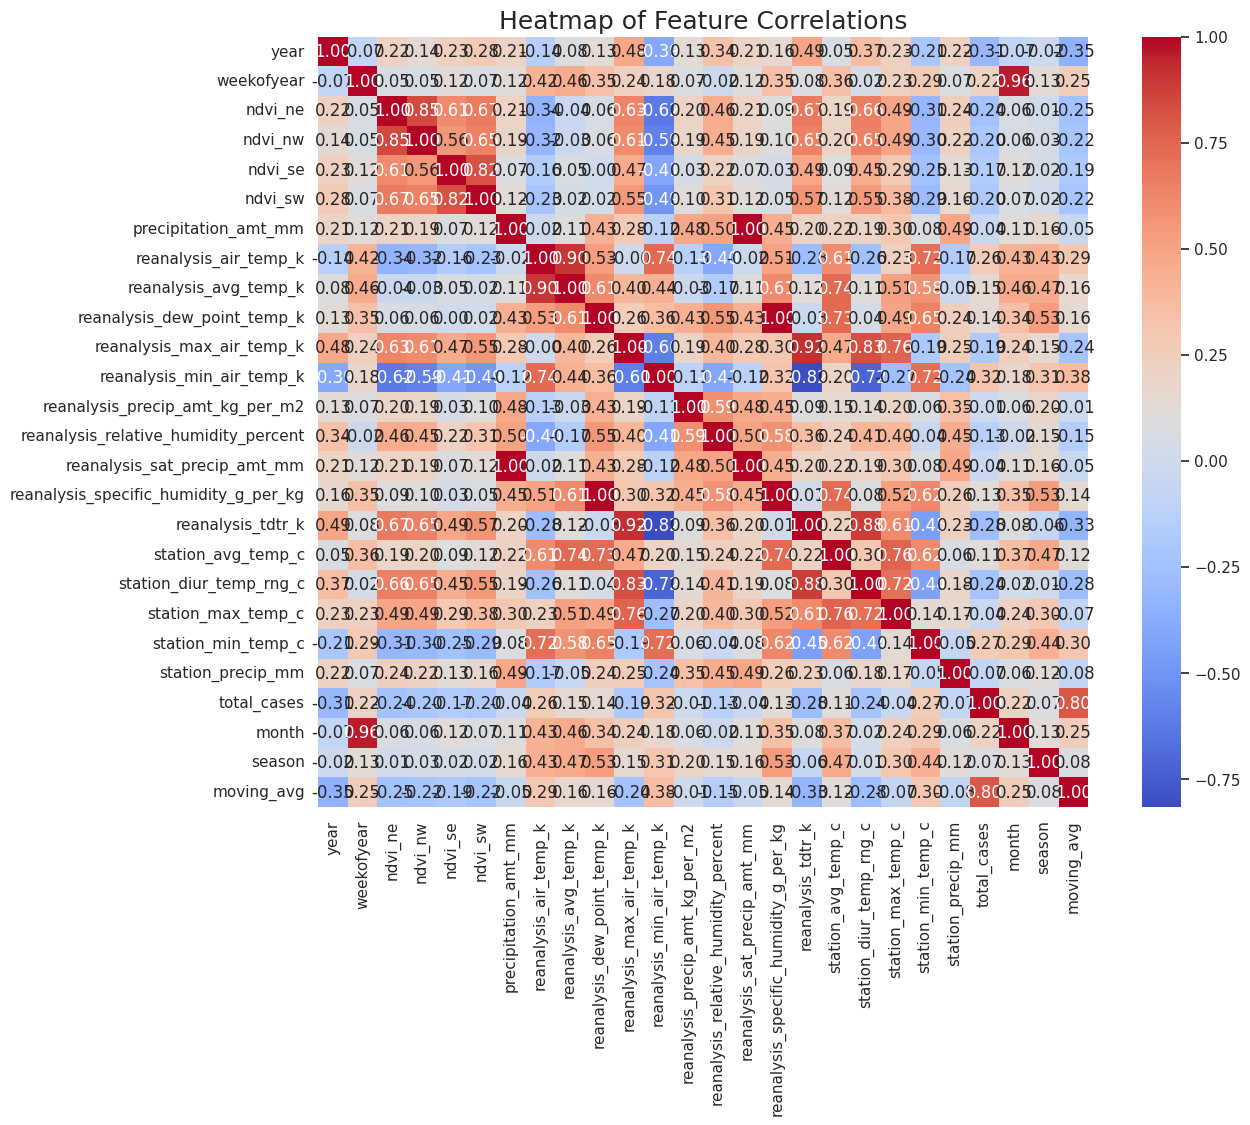

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric and target columns for heatmap
corr_df = train.drop(columns=['city', 'week_start_date'])
corr = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Heatmap of Feature Correlations", fontsize=18)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Select features and target
features = train.drop(columns=['city', 'week_start_date', 'total_cases'])
target = train['total_cases']

# Basic model pipeline
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features, target, cv=kfold, scoring='neg_mean_absolute_error')

print("📊 Mean MAE from 5-fold CV:", -scores.mean())


📊 Mean MAE from 5-fold CV: 10.969391423057008


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [10, 20, None],
    'randomforestregressor__min_samples_split': [2, 5]
}

# Same pipeline for Grid Search
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(features, target)

print(" Best Params:", grid_search.best_params_)
print(" Best MAE:", -grid_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   1.4s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   1.3s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   1.3s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=200; total time=   2.3s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=200; total time=   2.0s
[CV] END randomforestregressor__max_depth=10, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=200; total time=   2.2s
[CV] END randomforestregressor__max_dep

In [ ]:
train['total_cases_lag_1'] = train['total_cases'].shift(1)
train['total_cases_lag_2'] = train['total_cases'].shift(2)


In [ ]:
train['reanalysis_temp_k_roll'] = train['reanalysis_avg_temp_k'].rolling(3).mean()


In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Ridge': Ridge(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Lasso': Lasso(),
    'Linear Regression': LinearRegression()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name} Average MAE: {-scores.mean():.2f}")


Random Forest Average MAE: 1.82


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 1239, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
}
grid = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X, y)
print("Best Params:", grid.best_params_)
print("Best Score (MAE):", -grid.best_score_)


Best Params: {'max_depth': 10, 'n_estimators': 50}
Best Score (MAE): 3.30622625660435


In [ ]:
!pip install shap

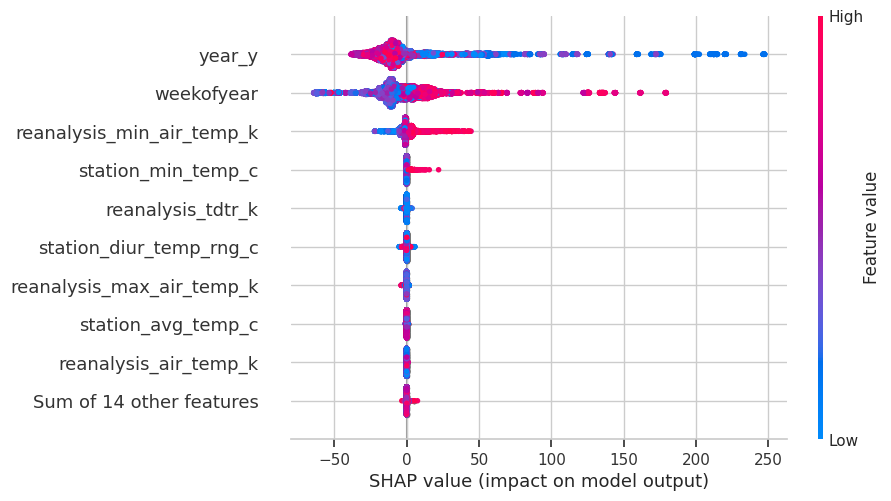

In [ ]:
import shap

explainer = shap.Explainer(grid.best_estimator_)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load datasets
features_train = pd.read_csv("dengue_features_train.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")

# Merge labels with training data
df = pd.merge(features_train, labels_train, on=["city", "year", "weekofyear"])
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Focus on San Juan ('sj')
sj_df = df[df['city'] == 'sj'].copy()
sj_df.set_index('week_start_date', inplace=True)
sj_df['total_cases'] = sj_df['total_cases'].astype(float)

# Fill missing values using forward fill
sj_df.ffill(inplace=True)

# SARIMA modeling for San Juan
sarima_model = SARIMAX(sj_df['total_cases'], order=(2,1,2), seasonal_order=(1,1,1,52))
sarima_result = sarima_model.fit(disp=False)

# Forecast the last available 17 weeks due to data limitations
forecast_steps = 17
forecast_sarima = sarima_result.predict(start=len(sj_df)-forecast_steps, end=len(sj_df)-1)
actual = sj_df['total_cases'].iloc[-forecast_steps:]

# LSTM preparation
scaler = MinMaxScaler()
scaled_cases = scaler.fit_transform(sj_df[['total_cases']])

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 10
X_lstm, y_lstm = create_sequences(scaled_cases, seq_length)

# Train-test split
X_train_lstm = X_lstm[:-forecast_steps]
y_train_lstm = y_lstm[:-forecast_steps]
X_test_lstm = X_lstm[-forecast_steps:]
y_test_lstm = y_lstm[-forecast_steps:]

# Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae')
model.fit(X_train_lstm, y_train_lstm, epochs=20, verbose=0)

# Predict with LSTM and inverse scale
pred_lstm = model.predict(X_test_lstm)
pred_lstm = scaler.inverse_transform(pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)

# Evaluation Metrics
sarima_mae = mean_absolute_error(actual, forecast_sarima)
lstm_mae = mean_absolute_error(y_test_lstm, pred_lstm)
sarima_rmse = np.sqrt(mean_squared_error(actual, forecast_sarima))
lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, pred_lstm))

(sarima_mae, sarima_rmse, lstm_mae, lstm_rmse)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


(3.3696127973217354,
 np.float64(3.981970832284626),
 2.4428537733414593,
 np.float64(3.1366920778103613))

In [ ]:
import pandas as pd

# Load datasets
features_df = pd.read_csv("dengue_features_train.csv")
labels_df = pd.read_csv("dengue_labels_train.csv")

# Merge on city, year, weekofyear
df = pd.merge(features_df, labels_df, on=["city", "year", "weekofyear"])

# Convert 'week_start_date' to datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Sort values
df = df.sort_values(by=["city", "week_start_date"]).reset_index(drop=True)

# Fill missing values using forward fill (city-wise)
df = df.groupby("city").apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

# Set datetime as index for time series modeling
df.set_index("week_start_date", inplace=True)

# Separate by city for further modeling
sj_df = df[df['city'] == 'sj'].copy()
iq_df = df[df['city'] == 'iq'].copy()

# Drop unused columns for modeling
sj_df.drop(columns=["city"], inplace=True)
iq_df.drop(columns=["city"], inplace=True)

# Show cleaned data summary
print("San Juan Data:", sj_df.shape)
print("Iquitos Data:", iq_df.shape)
sj_df.head()


San Juan Data: (936, 23)
Iquitos Data: (520, 23)


<ipython-input-32-a1c7a28f9497>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("city").apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
def sarima_forecast(df, city_name, steps=156):
    # Get target variable
    y = df['total_cases']

    # Fit SARIMA (You can tune (p,d,q)(P,D,Q,s) if needed)
    model = sm.tsa.statespace.SARIMAX(y,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 52),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    results = model.fit(disp=False)

    # Forecast future values
    forecast = results.forecast(steps=steps)

    # Plot actual vs forecast
    plt.figure(figsize=(12, 5))
    plt.plot(y, label='Historical')
    plt.plot(pd.date_range(start=y.index[-1], periods=steps+1, freq='W')[1:], forecast, label='SARIMA Forecast', linestyle='dashed')
    plt.title(f"{city_name} - SARIMA 3 Year Forecast of Dengue Cases")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


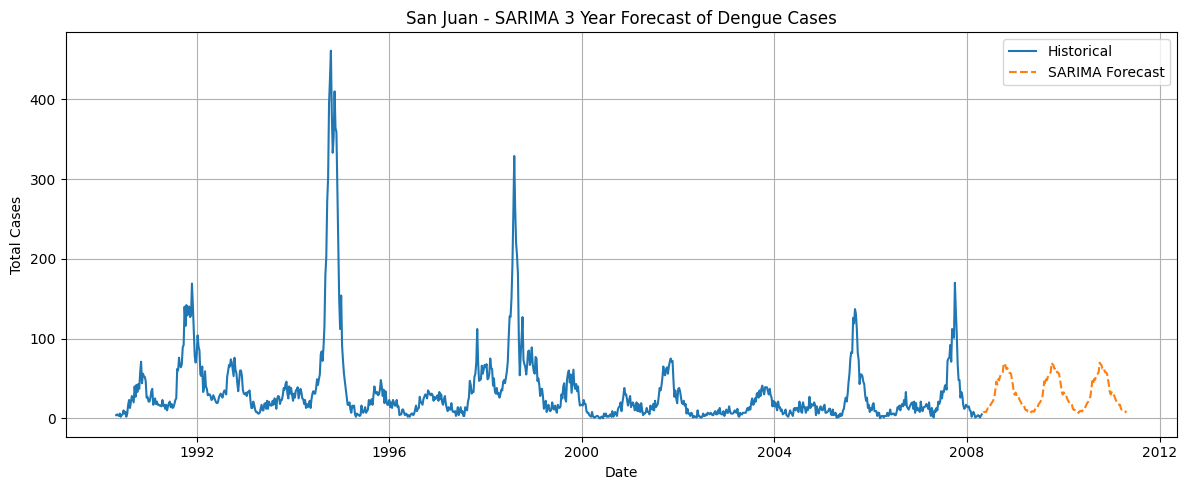

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


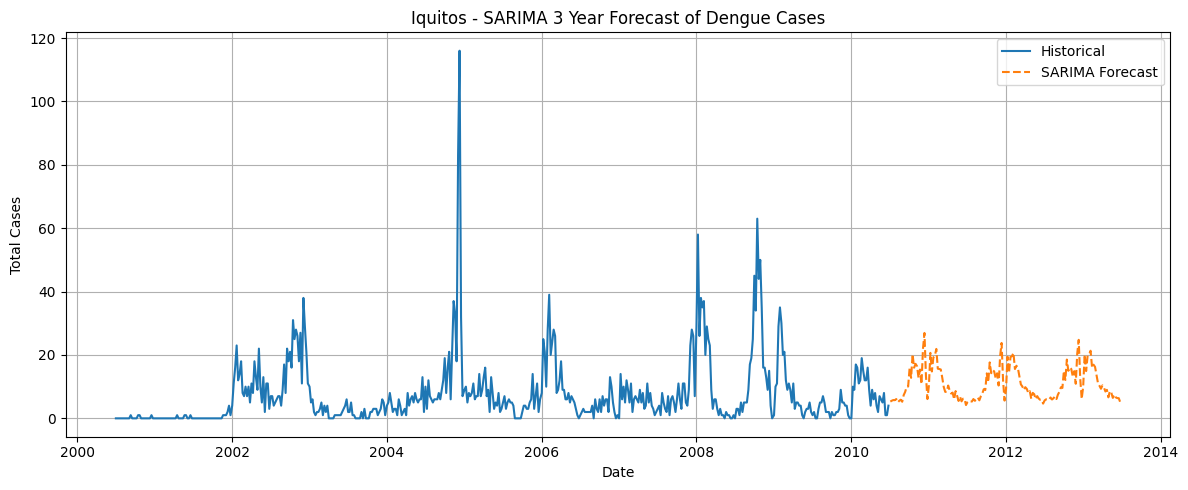

In [ ]:
sarima_sj_forecast = sarima_forecast(sj_df, "San Juan")
sarima_iq_forecast = sarima_forecast(iq_df, "Iquitos")
